<a href="https://colab.research.google.com/github/karnali/covid_19_colab/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Reading the dataset https://github.com/CSSEGISandData/2019-nCoV
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-08-2020.csv')
                 

In [4]:
# Let's look at the various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 8 columns):
Province/State    155 non-null object
Country/Region    255 non-null object
Last Update       255 non-null object
Confirmed         255 non-null int64
Deaths            255 non-null int64
Recovered         255 non-null int64
Latitude          255 non-null float64
Longitude         255 non-null float64
dtypes: float64(2), int64(3), object(3)
memory usage: 16.1+ KB


In [5]:
df.describe()

,Confirmed,Deaths,Recovered,Latitude,Longitude
count,255.00000,255.000000,255.000000,255.000000,255.000000
mean,430.72549,14.913725,238.019608,32.777938,-13.082458
std,4302.71234,188.609605,2838.177099,19.209053,88.840827
min,0.00000,0.000000,0.000000,-41.454500,-157.858400
25%,1.00000,0.000000,0.000000,29.105600,-86.842100
50%,4.00000,0.000000,0.000000,37.601700,-8.000000
75%,35.50000,0.000000,1.000000,42.859400,55.500000
max,67707.00000,2986.000000,45235.000000,64.963100,174.886000


In [6]:
# Countries affected
countries = df['Country/Region'].unique().tolist()
# print(countries)

print("\nTotal countries affected by virus: ",len(countries))


Total countries affected by virus:  108


In [7]:
#Combining China and Mainland China cases
df['Country/Region'].replace({'Mainland China':'China'},inplace=True)
countries = df['Country/Region'].unique().tolist()
print(countries)
print("\nTotal countries affected by virus: ",len(countries))



['China', 'Italy', 'South Korea', 'Iran', 'France', 'Germany', 'Others', 'Spain', 'Japan', 'Switzerland', 'UK', 'Netherlands', 'Sweden', 'Belgium', 'Norway', 'Singapore', 'Hong Kong', 'Austria', 'Malaysia', 'Bahrain', 'US', 'Greece', 'Kuwait', 'Iraq', 'Iceland', 'Thailand', 'Egypt', 'Taiwan', 'United Arab Emirates', 'India', 'Israel', 'Australia', 'San Marino', 'Denmark', 'Lebanon', 'Czech Republic', 'Portugal', 'Vietnam', 'Canada', 'Finland', 'Palestine', 'Republic of Ireland', 'Brazil', 'Algeria', 'Ireland', 'Russia', 'Oman', 'Slovenia', 'Qatar', 'Romania', 'Ecuador', 'Georgia', 'Argentina', 'Croatia', 'Poland', 'Saudi Arabia', 'Estonia', 'Macau', 'Philippines', 'Azerbaijan', 'Chile', 'Hungary', 'Mexico', 'Belarus', 'Indonesia', 'Pakistan', 'Peru', 'Costa Rica', 'Dominican Republic', 'French Guiana', 'New Zealand', 'Afghanistan', 'Bulgaria', 'Maldives', 'Senegal', 'Bangladesh', 'Bosnia and Herzegovina', 'Luxembourg', 'Malta', 'North Macedonia', 'Saint Barthelemy', 'Slovakia', 'South 

In [8]:
# Set it None to display all rows in the dataframe
pd.set_option('display.max_rows', None)

# Creating a dataframe with total no of confirmed cases for every Country/Region
Number_of_countries = len(df['Country/Region'].value_counts())
cases = pd.DataFrame(df.groupby('Country/Region')['Confirmed','Deaths'].sum())
cases['Country/Region'] = cases.index

global_cases = cases[['Confirmed','Deaths']]


dfsort = global_cases.sort_values(by = ['Deaths'], ascending = False)
print ("Countries sorted by most deaths")
display(dfsort)
dfsort.to_csv('today.csv',index=True)


Countries sorted by most deaths


,Confirmed,Deaths
Country/Region,,
China,80699,3097
Italy,7375,366
Iran,6566,194
South Korea,7314,50
US,537,21
France,1126,19
Spain,673,17
Others,696,6
Iraq,60,6


In [9]:
dfglobal = pd.read_csv("today.csv")
dfglobal['Death_Percent'] = round((dfglobal['Deaths'] / dfglobal['Confirmed']) *100,2)
dfglobal = dfglobal.sort_values(by = ['Death_Percent'], ascending = False)
dfglobal.head(10)


,Country/Region,Confirmed,Deaths,Death_Percent
8,Iraq,60,6,10.00
15,Philippines,10,1,10.00
20,Argentina,12,1,8.33
10,Australia,76,4,5.26
1,Italy,7375,366,4.96
4,US,537,21,3.91
0,China,80699,3097,3.84
2,Iran,6566,194,2.95
18,San Marino,36,1,2.78
13,Hong Kong,114,3,2.63


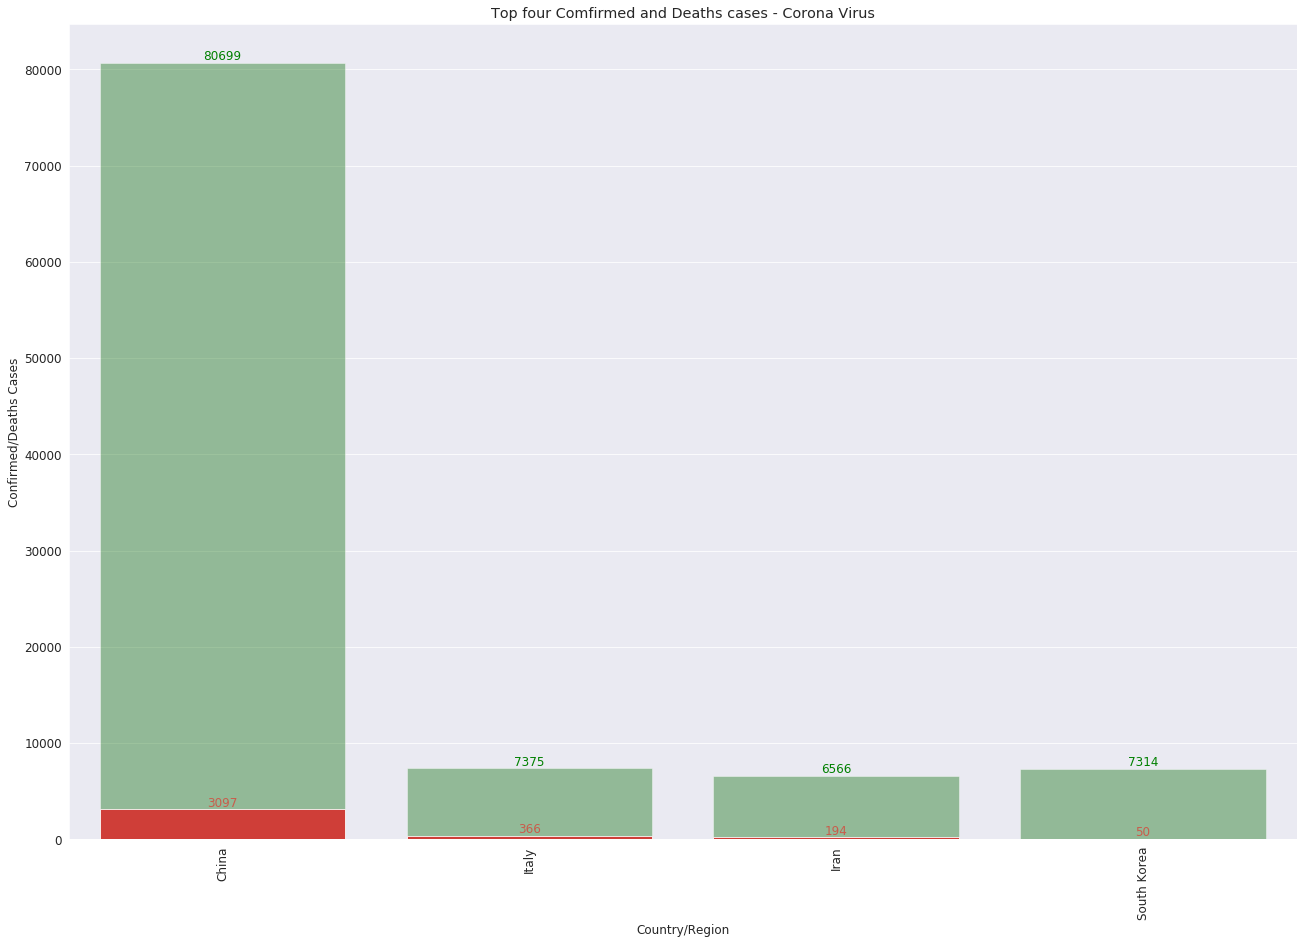

In [13]:
sns.set_style("darkgrid")
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.figure(figsize=(22,15))
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  skiprows = range(5,200))

g =sns.barplot(x='Country/Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country/Region',y='Deaths',color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')

plt.title('Top four Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country/Region'], rotation='vertical', fontsize=12)
plt.show()


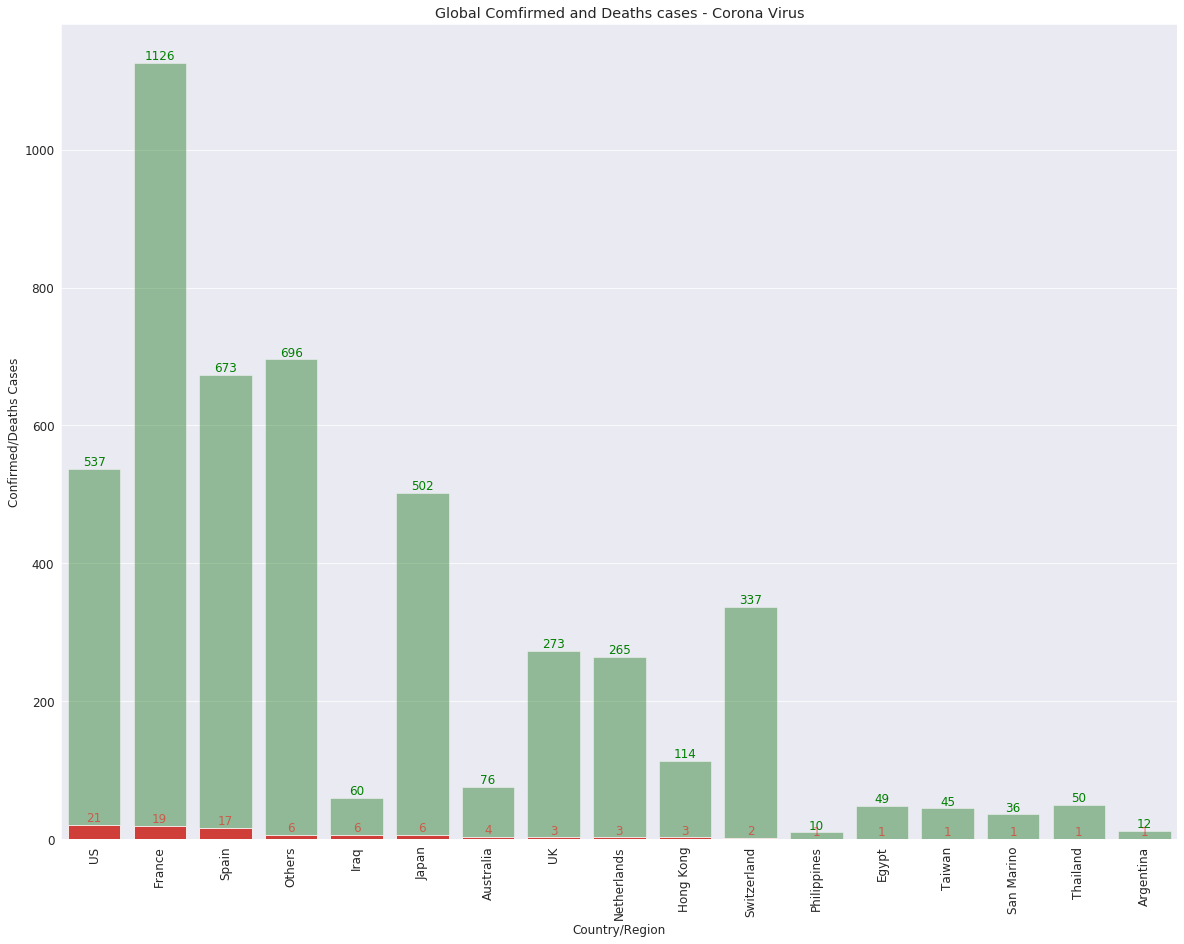

In [14]:
sns.set_style("darkgrid")
nbr_rows_to_skip = range(1,5)
nbr_rows_to_read = 17
#plt.rcParams['figure.figsize'] = (22.0, 15.0)
plt.figure(figsize=(20,15))
plt.rcParams['font.family'] = "Arial"
plt.rcParams['font.size'] = "12"

dfglobal = pd.read_csv("today.csv",  nrows=nbr_rows_to_read, skiprows=nbr_rows_to_skip)

g =sns.barplot(x='Country/Region',y='Confirmed',color='Green', alpha=0.4, data=dfglobal)
g =sns.barplot(x='Country/Region',y='Deaths', color='red', alpha=0.8, data=dfglobal)
g.set_ylabel('Confirmed/Deaths Cases')

for index, row in dfglobal.iterrows():
    g.text(row.name,row.Confirmed, round(row.Confirmed,2), color='Green', ha='center', va='bottom')
    g.text(row.name,row.Deaths, round(row.Deaths,2), color='red', alpha=0.5, ha='center', va='bottom')
    
    
plt.title('Global Comfirmed and Deaths cases - Corona Virus')
g.set_xticklabels(dfglobal['Country/Region'], rotation='vertical', fontsize=12)
plt.show()

